<a href="https://colab.research.google.com/github/Gangamurmu/BrainTumorSegmentation/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import os

In [ ]:
# import numpy as np
# from PIL import Image

# # Load the RawB volume into a numpy array
# volume = np.fromfile("/content/drive/MyDrive/t1_icbm_normal_1mm_pn3_rf20.rawb", dtype=np.uint8)

# # Reshape the array into a 3D volume with dimensions (z, y, x)
# shape = (181, 217, 181)  # Adjust these values to match the dimensions of your volume
# volume = volume.reshape(shape)

# # Iterate over the slices of the volume
# for z in range(volume.shape[0]):
#     # Extract the current slice as a 2D image
#     slice = volume[z, :, :]

#     # Convert the slice to an image object using the Image module
#     img = Image.fromarray(slice)

#     # Save the image as a PGM file
#     os.remove(f"slice_{z}.pgm")
#     # with open(f"slice_{z}.pgm", "w") as pgm_file:
#     #   pgm_file.write("P2\n")
#     #         pgm_file.write(f"{width} {height}\n")
#     #         pgm_file.write("255\n")



In [ ]:
import struct

# Set the dimensions of the volume
width = 181
height = 217
depth = 181

# Open the input file in binary mode
with open("/content/drive/MyDrive/t1_icbm_normal_1mm_pn3_rf20.rawb", "rb") as file:
    # Loop through each slice in the volume
    for z in range(depth):
        # Create a new PGM file for the slice
        with open(f"/content/drive/MyDrive/outputfiles/slice_{z}.pgm", "w") as pgm_file:
            # Write the PGM file header
            pgm_file.write("P2\n")
            pgm_file.write("#\n")
            pgm_file.write(f"{width} {height}\n")
            pgm_file.write("255\n")

            # Loop through each row in the slice
            for y in range(height):
                # Read a row of data from the input file
                row_data = file.read(width)  # Each value is 1 byte
                # Unpack the row data into a list of integers
                values = struct.unpack(f"{width}B", row_data)
                # Find the maximum value in the input data
                max_value = max(values)
                # Scale the values down to the maximum range of 255
                scaled_values = [int(v * 255 / max_value) for v in values]

                # Convert each value to decimal and write it to the PGM file
                pgm_file.write(" ".join([str(v) for v in values]) + "\n")

43


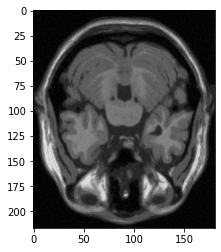

In [ ]:
idx = random.randint(0, 181)
print(idx)
path = f"/content/drive/MyDrive/outputfiles/slice_{idx}.pgm"
image = cv2.imread(path)

# Display the image using imshow
plt.imshow(image)

